# Layer selection for audio tagging with pretrained models

In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os

In [2]:
exp_root = "/lium/raid-b/tmario/train/SAE/ssl_downstream"
exp_list = os.listdir(exp_root)
to_move = ["001_esc50_42","002_esc50_42", "003_esc50_42", "004_esc50_42"] # + [f"0{i}_esc50_42" for i in range(40,46)]
for e in to_move:
    if e in exp_list:
        exp_list.remove(e)
print(exp_list)


['034_esc50_42', '024_esc50_42', '043_esc50_42', '014_esc50_42', '023_esc50_42', '033_esc50_42', '044_esc50_42', '013_esc50_42', '042_esc50_42', '015_esc50_42', '005_esc50_42', '035_esc50_42', '025_esc50_42', '045_esc50_42', '012_esc50_42', '022_esc50_42', '032_esc50_42', '021_esc50_42', '031_esc50_42', '011_esc50_42', '039_esc50_42', '036_esc50_42', '026_esc50_42', '029_esc50_42', '016_esc50_42', '019_esc50_42', '041_esc50_42', '009_esc50_42', '006_esc50_42', '010_esc50_42', '020_esc50_42', '030_esc50_42', '018_esc50_42', '017_esc50_42', '040_esc50_42', '007_esc50_42', '008_esc50_42', '037_esc50_42', '038_esc50_42', '028_esc50_42', '027_esc50_42']


In [3]:
hubert_acc = []
ast_acc = []
wav_acc = []
layer_idx_hub=[]
layer_idx_ast=[]
layer_idx_wav=[]
for exp in exp_list:
    exp_id = exp[:3]
    exp_path = os.path.join(exp_root, exp)
    cfg_path = os.path.join(exp_path, "config.json")

    with open(cfg_path,"r") as fh:
        cfg = json.load(fh)

    model_type = cfg["model"]["encoder_type"]
    layer_idx = cfg["model"]["use_layer_indices"][0]

    with open(os.path.join(exp_path,"metrics/metrics_summary_foldesc50.json"),"r") as fh:
        metrics = json.load(fh)

    if model_type == "hubert":
        hubert_acc.append(metrics["acc"]["mean"])
        layer_idx_hub.append(layer_idx)
    elif model_type == "ast":
        ast_acc.append(metrics["acc"]["mean"])
        layer_idx_ast.append(layer_idx)
    elif model_type == "wavlm":
        wav_acc.append(metrics["acc"]["mean"])
        layer_idx_wav.append(layer_idx)
    

(0.0, 1.0)

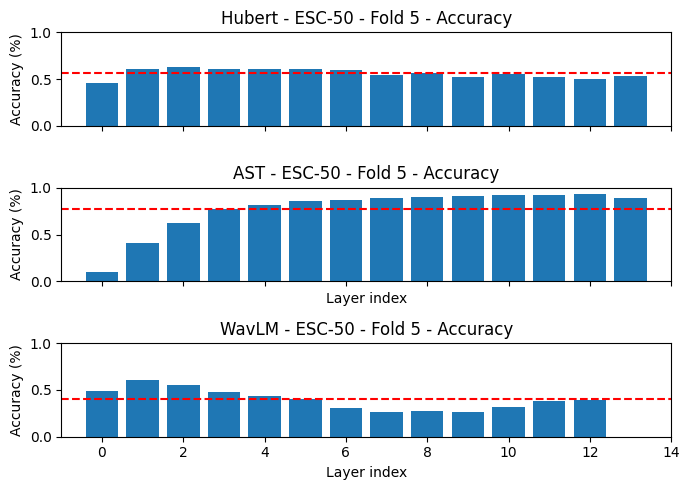

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=1, layout='tight', figsize=(7,5), sharex=True)

hubert_acc = np.array(hubert_acc)
ast_acc = np.array(ast_acc)
wav_acc = np.array(wav_acc)

ax = axs[0]
ax.bar(layer_idx_hub, hubert_acc)
ax.hlines([hubert_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_ylim(0., 1.)
ax.set_xlim([-1,len(hubert_acc)])
ax.set_ylabel("Accuracy (%)")
ax.set_title('Hubert - ESC-50 - Fold 5 - Accuracy')

ax = axs[1]
ax.bar(layer_idx_ast, ast_acc)
ax.hlines([ast_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("Layer index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('AST - ESC-50 - Fold 5 - Accuracy')
ax.set_ylim(0., 1.)

ax = axs[2]
ax.bar(layer_idx_wav, wav_acc)
ax.hlines([wav_acc.mean()],xmin=-1,xmax=len(hubert_acc),linestyle="--",color='r')
ax.set_xlim([-1,len(hubert_acc)])
ax.set_xlabel("Layer index")
ax.set_ylabel("Accuracy (%)")
ax.set_title('WavLM - ESC-50 - Fold 5 - Accuracy')
ax.set_ylim(0., 1.)
